In [57]:
from pmdarima.arima import auto_arima
from IPython.core.debugger import set_trace

%load_ext nb_black

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

plt.style.use(style="seaborn")
%matplotlib inline
df = pd.read_csv("AAPL.csv")

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [58]:
df.tail(5)

,Date,High,Low,Open,Close,Volume,Adj Close
2342,2021-04-27,135.410004,134.110001,135.009995,134.389999,66015800.0,134.389999
2343,2021-04-28,135.020004,133.080002,134.309998,133.580002,107760100.0,133.580002
2344,2021-04-29,137.070007,132.449997,136.470001,133.479996,151101000.0,133.479996
2345,2021-04-30,133.559998,131.070007,131.779999,131.460007,109713200.0,131.460007
2346,2021-05-03,134.070007,131.830002,132.039993,132.539993,72299748.0,132.539993


<IPython.core.display.Javascript object>

In [59]:
df = df[["Close"]].copy()

<IPython.core.display.Javascript object>

In [60]:
df.describe()

,Close
count,2347.000000
mean,42.024347
std,29.277501
min,13.947500
25%,23.096071
50%,31.112499
75%,48.165001
max,143.160004


<IPython.core.display.Javascript object>

In [5]:
# Check if price series is stationary
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.Close.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: 1.8986070429559412
p-value: 0.998525774575582


<IPython.core.display.Javascript object>

In [6]:
from statsmodels.graphics.tsaplots import plot_acf

<IPython.core.display.Javascript object>

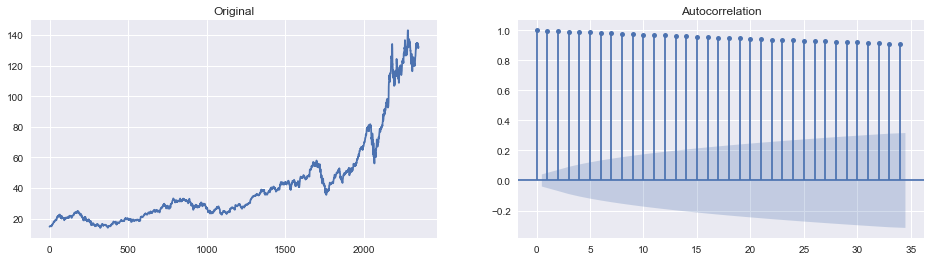

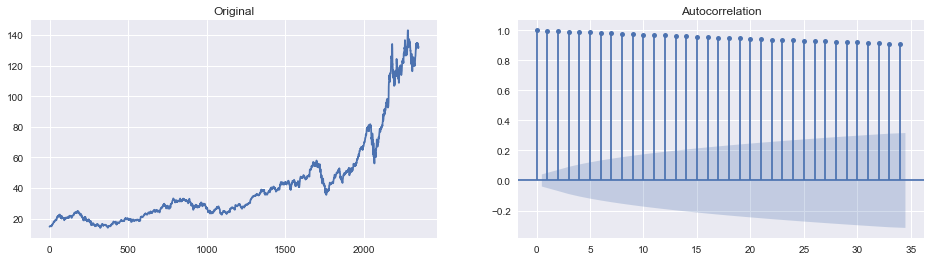

<IPython.core.display.Javascript object>

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(df.Close)
ax1.set_title("Original")
plot_acf(df.Close, ax=ax2)

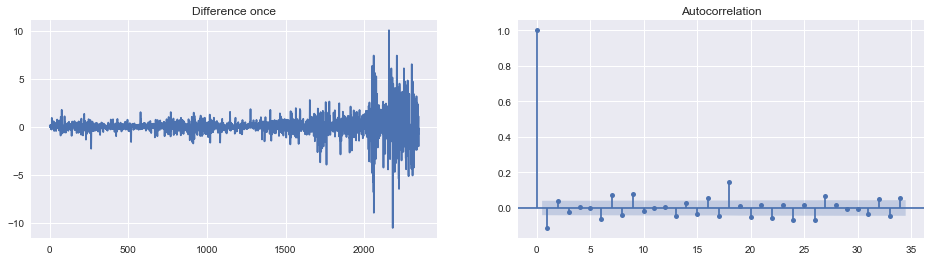

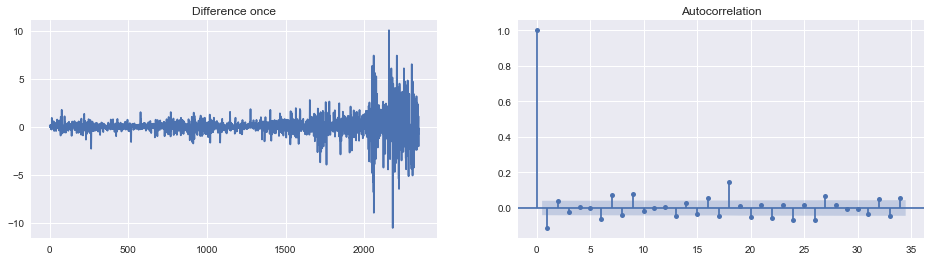

<IPython.core.display.Javascript object>

In [8]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2)

In [9]:
result = adfuller(df.Close.diff().dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -9.440679346515083
p-value: 4.904401703660838e-16


<IPython.core.display.Javascript object>

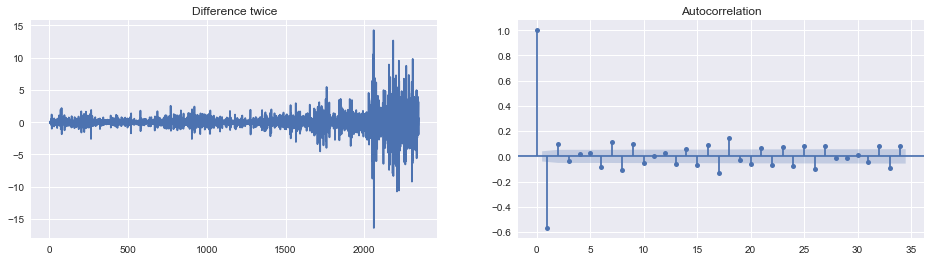

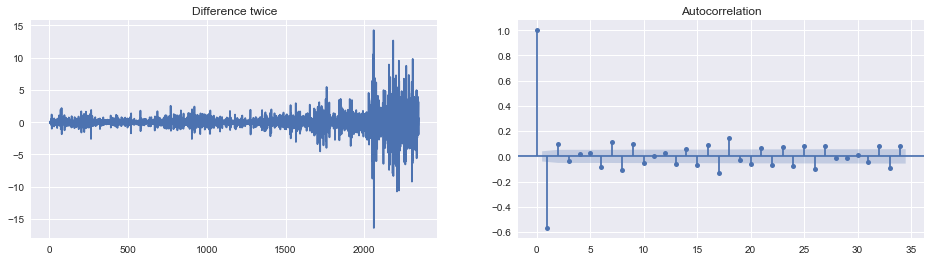

<IPython.core.display.Javascript object>

In [10]:
diff = df.Close.diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference twice")
plot_acf(diff, ax=ax2)

In [11]:
from pmdarima.arima.utils import ndiffs

<IPython.core.display.Javascript object>

In [12]:
ndiffs(df.Close, test="adf")

1

<IPython.core.display.Javascript object>

In [13]:
from statsmodels.graphics.tsaplots import plot_pacf

<IPython.core.display.Javascript object>

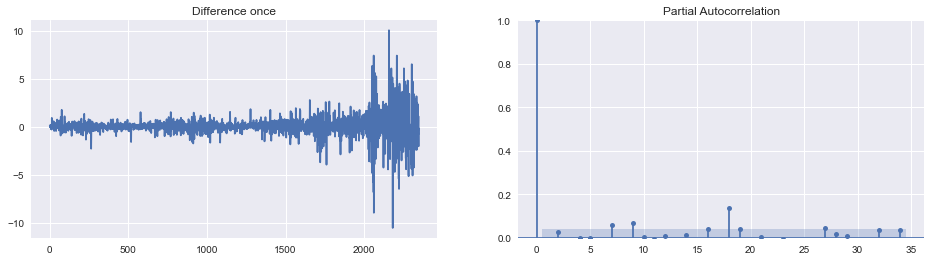

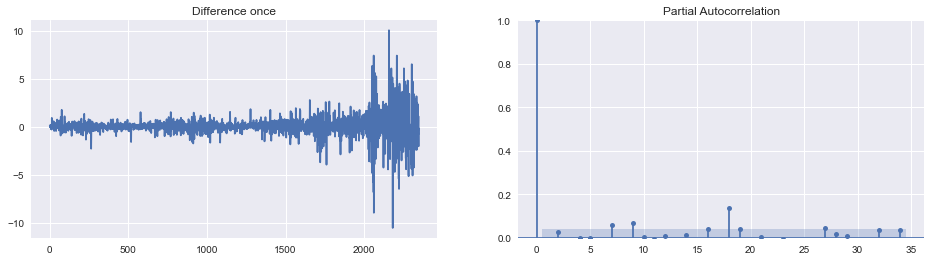

<IPython.core.display.Javascript object>

In [14]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2)

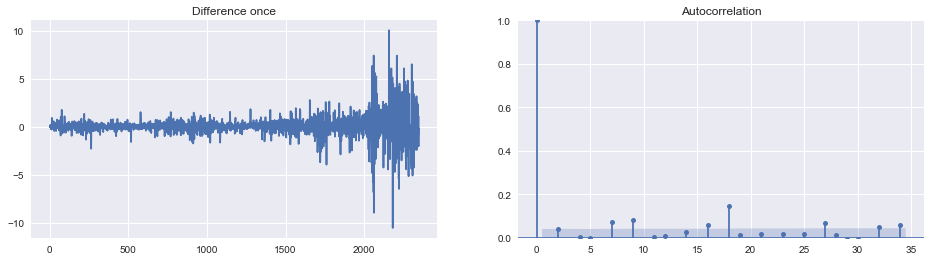

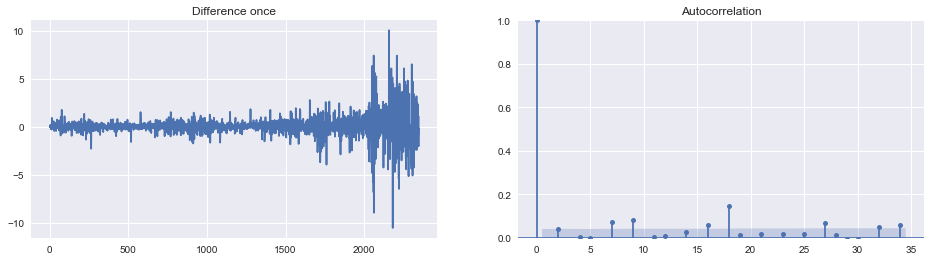

<IPython.core.display.Javascript object>

In [15]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_acf(diff, ax=ax2)

In [16]:
from pmdarima.arima import auto_arima

<IPython.core.display.Javascript object>

In [17]:
model = auto_arima(
    df.Close,
    start_p=1,
    start_q=1,
    test="adf",
    max_p=6,
    max_q=6,
    m=1,  # frequency of series
    d=None,  # determine 'd'
    seasonal=False,  # no seasonality
    trace=True,
    stepwise=True,
)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7032.121, Time=1.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7059.698, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7032.043, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7033.745, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7062.682, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7032.435, Time=0.43 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7034.119, Time=1.14 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=7036.259, Time=0.11 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 3.437 seconds


<IPython.core.display.Javascript object>

In [18]:
from statsmodels.tsa.arima_model import ARIMA

# ARIMA Model
model = ARIMA(df.Close, order=(6, 1, 3))
result = model.fit(disp=0)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

<IPython.core.display.Javascript object>

In [19]:
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2346
Model:                 ARIMA(6, 1, 3)   Log Likelihood               -3476.398
Method:                       css-mle   S.D. of innovations              1.065
Date:                Fri, 07 May 2021   AIC                           6974.797
Time:                        18:56:36   BIC                           7038.162
Sample:                             1   HQIC                          6997.876
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0501      0.022      2.321      0.020       0.008       0.092
ar.L1.D.Close    -1.0335      0.118     -8.761      0.000      -1.265      -0.802
ar.L2.D.Close     0.6559      0.228     

<IPython.core.display.Javascript object>

(array([2.11658016e-04, 6.34974047e-04, 1.05829008e-03, 7.19637254e-03,
        4.82580276e-02, 4.13156447e-01, 1.96841955e-02, 4.86813436e-03,
        1.26994809e-03, 2.11658016e-04]),
 array([-10.7292731 ,  -8.71537602,  -6.70147894,  -4.68758186,
         -2.67368479,  -0.65978771,   1.35410937,   3.36800645,
          5.38190352,   7.3958006 ,   9.40969768]),
 <BarContainer object of 10 artists>)

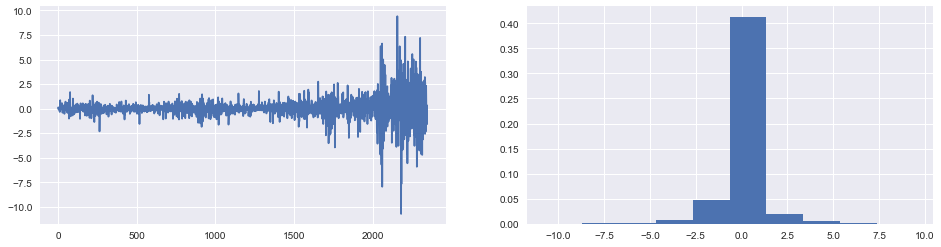

<IPython.core.display.Javascript object>

In [20]:
# Plot residual errors
residuals = pd.DataFrame(result.resid)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(residuals)
ax2.hist(residuals, density=True)

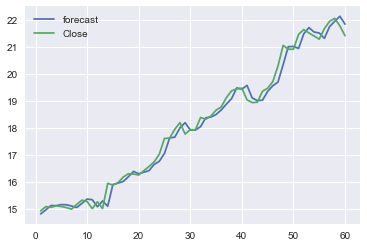

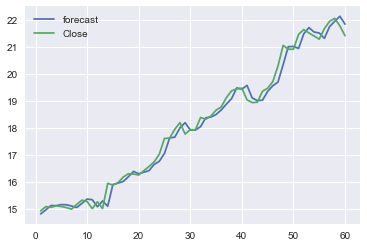

<IPython.core.display.Javascript object>

In [21]:
# Actual vs Fitted
result.plot_predict(
    start=1,
    end=60,
    dynamic=False,
)

In [22]:
n = int(len(df) * 0.8)
train = df.Close[:n]
test = df.Close[n:]

<IPython.core.display.Javascript object>

In [23]:
print(len(train))
print(len(test))

1877
470


<IPython.core.display.Javascript object>

In [48]:
step = 470

model = ARIMA(train, order=(6, 1, 3))
result = model.fit(disp=0)

# Forecast
fc, se, conf = result.forecast(step)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

<IPython.core.display.Javascript object>

In [63]:
fc = pd.Series(fc, index=test[:step].index)
lower = pd.Series(conf[:, 0], index=test[:step].index)
upper = pd.Series(conf[:, 1], index=test[:step].index)
fc

1877    49.950547
1878    49.995143
1879    50.023146
1880    50.113830
1881    50.141353
          ...    
2342    59.233724
2343    59.252630
2344    59.271893
2345    59.290712
2346    59.309836
Length: 470, dtype: float64

<IPython.core.display.Javascript object>

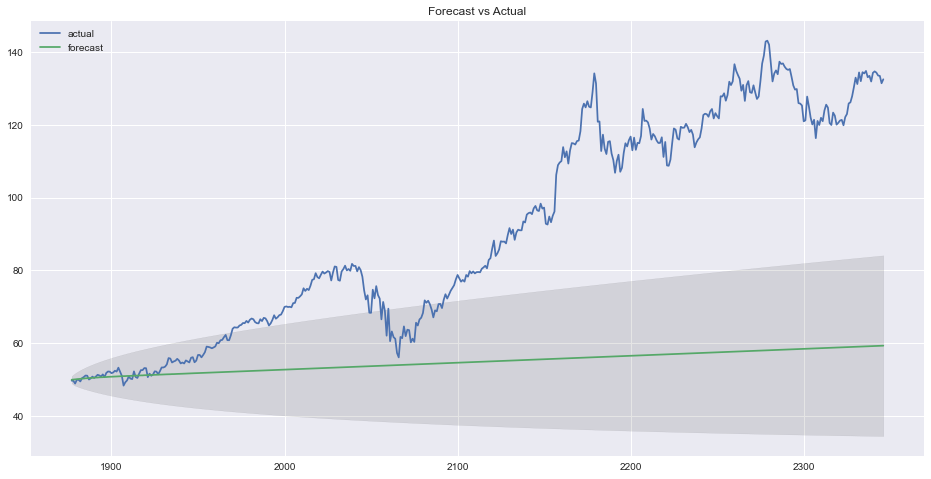

<IPython.core.display.Javascript object>

In [50]:
plt.figure(figsize=(16, 8))
plt.plot(test[:step], label="actual")
plt.plot(fc, label="forecast")
plt.fill_between(lower.index, lower, upper, color="k", alpha=0.1)
plt.title("Forecast vs Actual")
plt.legend(loc="upper left")

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print("R-Square Error:", metrics.r2_score(fc, test[:step]))
print("Mean Absolute Error:", metrics.mean_absolute_error(fc, test[:step]))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(fc, test[:step])))
print("Mean Squared Error:", metrics.mean_absolute_error(fc, test[:step]))

R-Square Error: -295.31698706502436
Mean Absolute Error: 35.885501848261384
Root Mean Squared Error: 44.750276063755976
Mean Squared Error: 35.885501848261384


<IPython.core.display.Javascript object>

In [28]:
resultsdf=  resultsdf.append(my_dict(symbol,'XGBRegressor','R-Square Error:',metrics.r2_score(y_test , predicted)),ignore_index=True)
resultsdf = resultsdf.append(my_dict(symbol,'XGBRegressor','Mean Absolute Error:', metrics.mean_absolute_error(y_test , predicted)),ignore_index=True)
resultsdf = resultsdf.append(my_dict(symbol,'XGBRegressor','Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test , predicted))),ignore_index=True)
resultsdf = resultsdf.append(my_dict(symbol,'XGBRegressor','Mean Squared Error:', metrics.mean_squared_error(y_test , predicted)),ignore_index=True)
# resultsdf=resultsdf.transpose()
resultsdf


array([ 0.50419304,  0.72145157,  0.87608139,  1.00211869,  1.12267766,
        1.23460349,  1.3380025 ,  1.43965486,  1.53357301,  1.62505348,
        1.71410406,  1.79760857,  1.88117605,  1.9606637 ,  2.03767083,
        2.11438783,  2.18681444,  2.25914231,  2.3294966 ,  2.39707601,
        2.4651174 ,  2.53002345,  2.59422268,  2.65783347,  2.71865139,
        2.77995661,  2.83927659,  2.89727922,  2.95549989,  3.01124847,
        3.06711127,  3.1220203 ,  3.17520817,  3.22892182,  3.28074242,
        3.33215125,  3.38339708,  3.43281009,  3.48266863,  3.5313337 ,
        3.57909854,  3.62717807,  3.67359942,  3.72014033,  3.76616154,
        3.81096009,  3.8562317 ,  3.90023404,  3.94393528,  3.98764498,
        4.03003608,  4.07279316,  4.11477476,  4.15607352,  4.19769229,
        4.23811867,  4.27863307,  4.31885457,  4.35814536,  4.39783697,
        4.43662884,  4.47516968,  4.51379322,  4.5514173 ,  4.58932867,
        4.62671363,  4.66354788,  4.7006763 ,  4.73691057,  4.77

<IPython.core.display.Javascript object>

In [65]:
conf[:, 1]

array([50.93874748, 51.40916228, 51.74023374, 52.07794648, 52.34176124,
       52.61463875, 52.88110961, 53.0926117 , 53.34591135, 53.55298341,
       53.75331842, 53.97964547, 54.14772488, 54.35233895, 54.5387262 ,
       54.69623394, 54.89614764, 55.04509276, 55.21199184, 55.38805403,
       55.51947929, 55.69517337, 55.83759746, 55.97453813, 56.14182259,
       56.25991238, 56.41150073, 56.55318936, 56.66830202, 56.82445549,
       56.93867856, 57.0673589 , 57.20908113, 57.31094572, 57.45263966,
       57.56880663, 57.67793265, 57.81709367, 57.91372144, 58.03866795,
       58.15881053, 58.25371874, 58.38616057, 58.48378203, 58.59188421,
       58.71474771, 58.80180473, 58.92353723, 59.02571659, 59.11933551,
       59.24144501, 59.32675837, 59.43530896, 59.54266612, 59.62611583,
       59.74316515, 59.83137651, 59.92652269, 60.03712142, 60.11564347,
       60.22387057, 60.31735958, 60.40116095, 60.51143012, 60.58998217,
       60.6872166 , 60.78589448, 60.86210937, 60.96803381, 61.05

<IPython.core.display.Javascript object>

In [66]:
test[:step].index

RangeIndex(start=1877, stop=2347, step=1)

<IPython.core.display.Javascript object>